<a href="https://colab.research.google.com/github/Ayobamijeje/EPR_workflow/blob/master/Hullfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array
import os
import cv2
import shutil
import matplotlib.pyplot as plt
from PIL import Image



In [2]:
# "C:\Users\Home\OneDrive\Desktop\MSc_project.zip"
#
from google.colab import drive
drive.mount('/content/drive')

!unzip '/content/drive/My Drive/MSc_project.zip' -d /content/



Streaming output truncated to the last 5000 lines.
  inflating: /content/MSc_project/Aug_TB/Aug_TB163.png  
  inflating: /content/MSc_project/Aug_TB/Aug_TB1630.png  
  inflating: /content/MSc_project/Aug_TB/Aug_TB1631.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1632.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1633.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1634.png  
  inflating: /content/MSc_project/Aug_TB/Aug_TB1635.png  
  inflating: /content/MSc_project/Aug_TB/Aug_TB1636.png  
  inflating: /content/MSc_project/Aug_TB/Aug_TB1637.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1638.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1639.png  
  inflating: /content/MSc_project/Aug_TB/Aug_TB164.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1640.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1641.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1642.png  
 extracting: /content/MSc_project/Aug_TB/Aug_TB1643.png  
  inflating: /content/M

In [4]:
image_file = '/content/MSc_project'

for i, j, k in os.walk(image_file):
  print(i, len(k))


/content/MSc_project 0
/content/MSc_project/NORMAL 1802
/content/MSc_project/PNEUMONIA 1800
/content/MSc_project/Aug_TB 2100


In [5]:
import numpy as np

images = image_dataset_from_directory(image_file)

for batches in images:
    for batch in batches:
        print(np.min(batch))
        print(np.max(batch))
        print(batch.shape)
    break



Found 5702 files belonging to 3 classes.
0.0
255.0
(32, 256, 256, 3)
0
2
(32,)


In [8]:
import math

train = int(len(images)*0.7)
val = int(len(images)*0.2)
test = int(len(images)*0.1)


train_images = images.take(train)
val_images = images.skip(train).take(val)
test_images = images.skip(train+val).take(test)

names = images.class_names

print(train, val, test)
print(names)


125 35 17
['Aug_TB', 'NORMAL', 'PNEUMONIA']


In [9]:
inputs = keras.Input(shape=(256, 256, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(names), activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])

# Print the model summary
model.summary()
# all 16, dense 32

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         524,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,507 (2.02 MB)

 Trainable params: 529,507 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

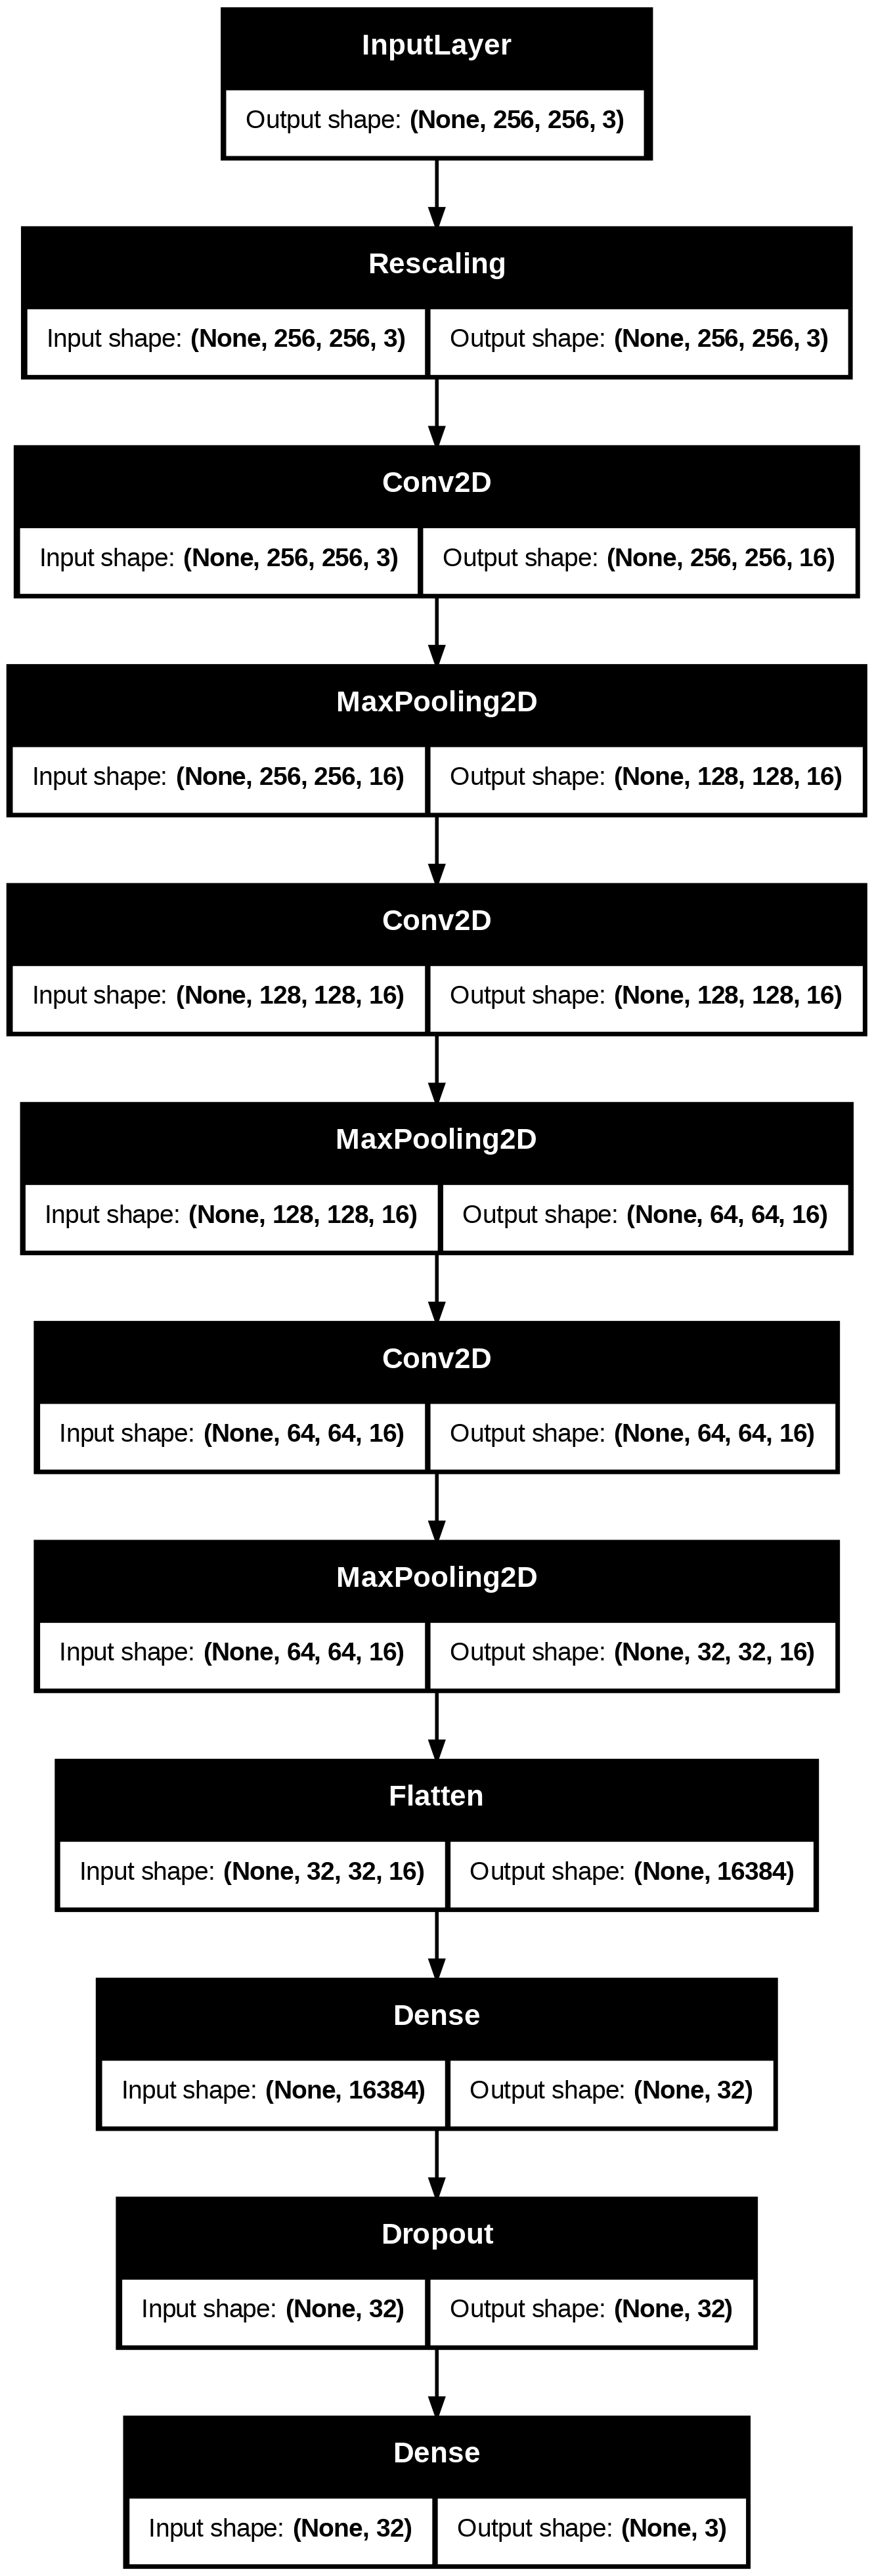

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_architecture.png', show_shapes=True)


In [11]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath= "/content/TBvsPneuProj.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_images,
 epochs=20,
 validation_data=val_images,
 callbacks=callbacks)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.6383 - loss: 0.7961 - val_accuracy: 0.9143 - val_loss: 0.2357
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.8757 - loss: 0.3522 - val_accuracy: 0.9241 - val_loss: 0.1906
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.9100 - loss: 0.2503 - val_accuracy: 0.9527 - val_loss: 0.1342
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.9313 - loss: 0.1851 - val_accuracy: 0.9473 - val_loss: 0.1346
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - accuracy: 0.9445 - loss: 0.1831 - val_accuracy: 0.9679 - val_loss: 0.0896
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.9482 - loss: 0.1409 - val_accuracy: 0.9679 - val_loss: 0.1097
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.9618 - loss: 0.1275 - val_accuracy: 0.9527 - val_loss: 0.1372
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.9589 - loss: 0

In [12]:
train_model = keras.models.load_model("/content/TBvsPneuProj.keras")

train_model.evaluate(test_images)

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9726 - loss: 0.0794


[0.08427463471889496, 0.966911792755127]

In [13]:
unbatched_test_ds = test_images.unbatch()

# Batch all examples at once for analysis
test_inputs, test_labels = [], []

for inputs, labels in unbatched_test_ds:
    test_inputs.append(inputs)
    test_labels.append(labels)

test_inputs = np.array(test_inputs)
test_labels = np.array(test_labels)


predicted_classes = train_model.predict(test_inputs)

predicted = np.argmax(predicted_classes, axis = 1)

print(predicted[:30])
print(test_labels[:30])
len(predicted)



17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
[0 2 2 0 0 1 0 1 1 0 1 0 2 2 2 2 0 1 1 1 2 2 1 1 1 0 1 0 1 0]
[0 2 2 0 0 1 0 1 1 0 1 0 2 2 2 2 0 1 1 1 2 2 1 1 1 0 1 0 1 0]


544

In [14]:
from google.colab import files

# Download the model file
files.download('/content/TBvsPneuProj.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd




pred_series = pd.Series(predicted).map(lambda x: names[x]).to_numpy()
test_lebel_series = pd.Series(test_labels).map(lambda x: names[x]).to_numpy()



cm = confusion_matrix(test_lebel_series, pred_series)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_lebel_series))
disp.plot(cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       0.97      0.96      0.97       350
           2       0.95      0.97      0.96       369

    accuracy                           0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120



NameError: name 'model' is not defined

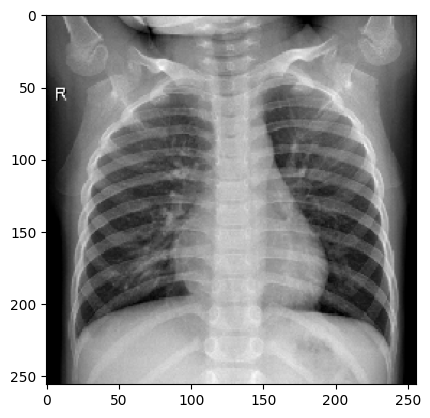

In [ ]:
image = img_to_array(load_img('/content/MSc_project/NORMAL/NORMAL_940.png', target_size=(256, 256)))


plt.imshow(image.astype("uint8"))
image = np.expand_dims(image, 0)

prediction = model.predict([image])

print(names[np.argmax(prediction)])
prediction


In [ ]:
# /content/MSc_project/PNEUMONIA/PNEUMONIA_890.png
#/content/MSc_project/PNEUMONIA/PNEUMONIA_906.png
# extracting: /content/MSc_project/NORMAL/NORMAL_940.png
# extracting: /content/MSc_project/NORMAL/NORMAL_941.png
#inflating: /content/MSc_project/Aug_TB/Aug_TB768.png
# extracting: /content/MSc_project/Aug_TB/Aug_TB769.png

### Grad Cam

In [ ]:
last_conv_layer_name = "conv2d_2"
classifier_layer_names = [
  'max_pooling2d_2',
  'flatten',
  'dense',
  'dropout',
  'dense_1'
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [ ]:
last_conv_layer_model

<Functional name=functional_3, built=True>

In [ ]:
image_classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = image_classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(image_classifier_input, x)

In [ ]:
last_conv_layer_output = last_conv_layer_model(image)
preds = classifier_model(last_conv_layer_output)

#tf.argmax(preds[0])
preds[:, tf.argmax(preds[0])]


preds

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[9.999925e-01, 7.319509e-08, 7.437221e-06]], dtype=float32)>

In [ ]:
with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(image)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]
grads = tape.gradient(top_class_channel, last_conv_layer_output)

In [ ]:
'''last_conv_layer_output.shape

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()

last_conv_layer_output.numpy().shape


(1, 64, 64, 16)

In [ ]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

heatmap

array([[-5.2599763e-10, -2.9888814e-10,  1.5452229e-09, ...,
         1.0872144e-09,  4.7715637e-10,  9.4610919e-10],
       [-3.7737752e-10, -9.8224839e-10,  1.3618022e-09, ...,
         1.3747107e-09,  7.0794381e-10,  1.4095087e-09],
       [-1.2723139e-10, -7.8596574e-10,  4.4663551e-10, ...,
         1.4551436e-09,  7.3743173e-10,  1.3663441e-09],
       ...,
       [-2.7307245e-10,  1.5716561e-09,  8.4072532e-10, ...,
        -1.5058227e-10,  2.4411198e-10,  1.5908083e-09],
       [-3.0182545e-10,  6.2443273e-11, -1.6116973e-09, ...,
        -2.4583724e-10, -3.8181396e-11,  1.3648713e-09],
       [-1.2312285e-10, -1.8513241e-10, -1.1858843e-09, ...,
        -1.1865976e-09, -9.5385866e-10,  1.0924794e-09]], dtype=float32)

In [ ]:
heatmap.shape

(64, 64)

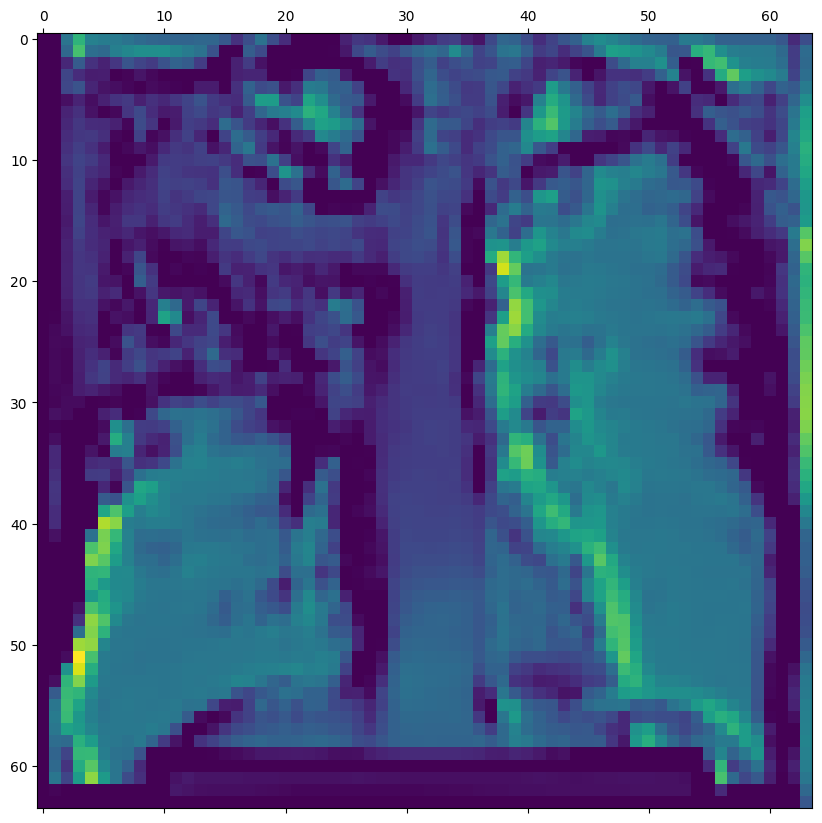

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

<ipython-input-213-af407c84de95>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


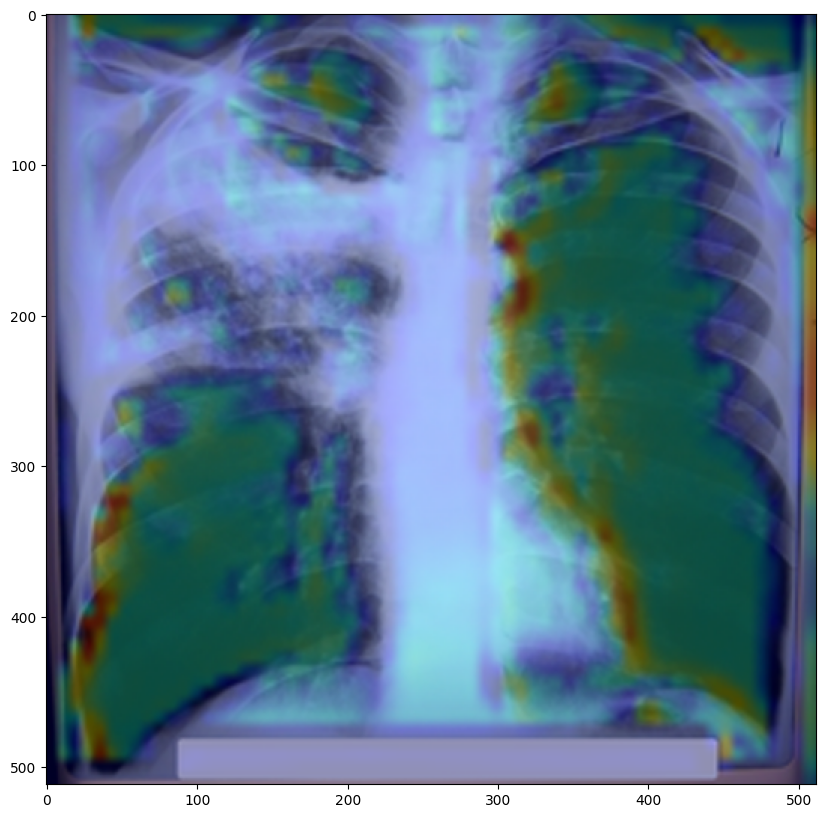

In [ ]:
import matplotlib.cm as cm

heatmap = np.uint8(255 * heatmap)

img = keras.utils.load_img('/content/Tuberculosis-186.png')
img = keras.utils.img_to_array(img)

jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)
save_path = "explainimg.jpg"
superimposed_img.save(save_path)

plt.imshow(superimposed_img)